In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.19.0


In [ ]:
# 1) load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2) normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 3) reshape the data to include the channel dimension
# input shape (60000, 28, 28) --> (60000, 28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(f"train features shape after reshape: {x_train.shape}")
print(f"test features shape after reshape: {x_test.shape}")

train features shape after reshape: (60000, 28, 28, 1)
test features shape after reshape: (10000, 28, 28, 1)


In [ ]:
# initialize sequential model
model = keras.Sequential([
    # step 2a: input layer oclock
    # first layer implicitly defines the input shape
    keras.Input(shape=(28, 28, 1)),

    # conv block 1 (steps 2b, 2c)
    # 2b
    keras.layers.Conv2D(
        filters=4,
        kernel_size=(3, 3),
        strides=(1, 1),
        activation='relu'
    ),

    # 2c
    keras.layers.MaxPool2D(
        pool_size=(2, 2),
        strides=2,
        padding='valid'
    ),

    # conv block 2 (step 2d)
    # extracting some more complex features
    keras.layers.Conv2D(
        filters=8, # inc filters
        kernel_size=(3, 3),
        strides=(1, 1),
        activation='relu'
    ),
    keras.layers.MaxPool2D(
        pool_size=(2, 2),
        strides=2,
        padding='valid'
    ),

    # 2e
    keras.layers.Flatten(),

    # 2f
    keras.layers.Dense(
        units=64,
        activation='relu'
    ),

    # 2g
    keras.layers.Dense(
        units=10, # 10 classes (digits 0-9)
        activation='softmax' # softmax for multi-class classification
    )
])

# model summary!
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 4)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 8)      │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,850 (54.10 KB)

 Trainable params: 13,850 (54.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # from_logits=False since we used softmax
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
batch_size = 2048
epochs = 15 # >10 epochs

# fit model and store history object
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2 # using 20% of training data for validation
)

Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 522ms/step - loss: 2.2128 - sparse_categorical_accuracy: 0.2442 - val_loss: 1.8315 - val_sparse_categorical_accuracy: 0.6047
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 486ms/step - loss: 1.6364 - sparse_categorical_accuracy: 0.6490 - val_loss: 0.9523 - val_sparse_categorical_accuracy: 0.8005
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 509ms/step - loss: 0.8325 - sparse_categorical_accuracy: 0.8016 - val_loss: 0.4905 - val_sparse_categorical_accuracy: 0.8667
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 519ms/step - loss: 0.4815 - sparse_categorical_accuracy: 0.8626 - val_loss: 0.3516 - val_sparse_categorical_accuracy: 0.9003
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 506ms/step - loss: 0.3687 - sparse_categorical_accuracy: 0.8936 - val_loss: 0.2919 - val_sparse_categorical_accuracy: 0.9145
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 525ms/step - loss: 0.3091 - sparse_categorical_accuracy: 0.9075 - val_loss: 0.2523 - val_sparse_categorical_accuracy: 0.928

In [ ]:
# evaluate on the training set
print("\ntime to eval on training set :P")
train_history = model.evaluate(x_train, y_train, verbose=0)
print(f"training loss: {train_history[0]:.4f}")
print(f"training acc: {train_history[1]:.4f}")

# eval on the test set
print("\nnow the test set?")
evaluate_history = model.evaluate(x_test, y_test, verbose=0)
print(f"test loss: {evaluate_history[0]:.4f}")
print(f"test acc: {evaluate_history[1]:.4f}")


time to eval on training set :P
training loss: 0.1236
training acc: 0.9623

now the test set?
test loss: 0.1152
test acc: 0.9652


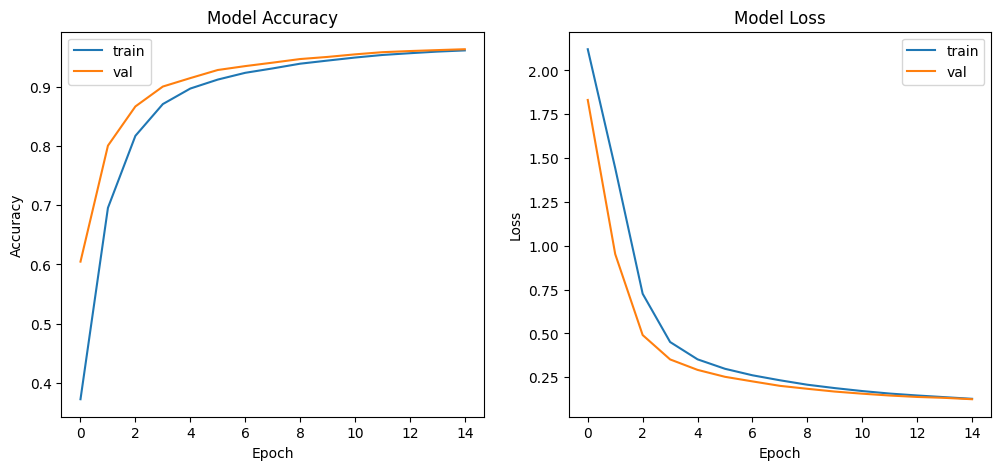

In [ ]:
# get metric name used in the history object
acc_metric = 'sparse_categorical_accuracy'

# 4a
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history[acc_metric], label='train')
plt.plot(history.history['val_' + acc_metric], label='val')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# 4b
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

In [ ]:
# print test accuracy
test_accuracy = evaluate_history[1]
print(f"final test acc: {test_accuracy:.4f}")

final test acc: 0.9652


The CNN successfully tackled MNIST achieving test accuracy of 0.9652. The model's architecture consisting of two blocks of convolution and max pooling layers followed by dense layers, proved highly effective with only 13,850 trainable parameters. Training for 15 epochs utilizing the Adam optimizer and sparse category crossentropy loss demonstrated consistent learning, as evidenced by the steady decrease in loss and increase in accuracy for both the training and validation sets, with the curves remaining closely aligned, indicating strong generalization and minimal overfitting.